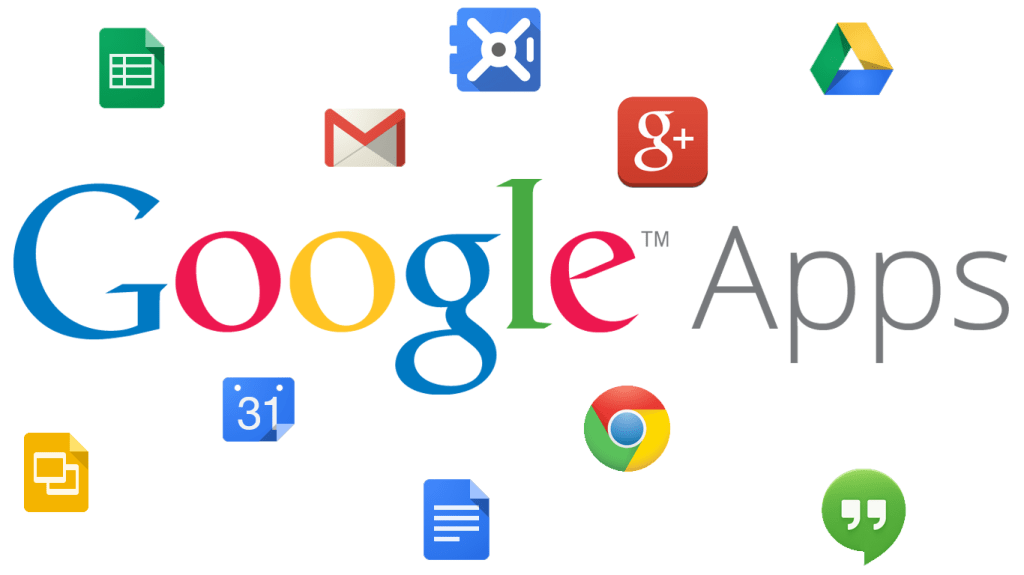

# Projeto 1 - Análise de Dados com Python com Aplicativos da **Google Apps Store**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('./data/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## a. Entender o que temos a disposição

In [3]:
df.shape

(10841, 13)

In [4]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [5]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## b. Limpeza (remoção dos Nulos e Duplicados)

In [7]:
# Verificar os nulos
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
df.shape

(10841, 13)

In [9]:
# Eliminar dados desaparecidos
df.dropna(how='any', inplace=True)
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [10]:
df.shape

(9360, 13)

In [11]:
# Verificar Duplicados
df.duplicated().sum()

474

In [12]:
# Eliminar os duplicados
df.drop_duplicates(inplace=True)
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [13]:
# Verificar o resultado
df.duplicated().sum()

0

In [16]:
df.shape

(10841, 13)

## c. Regularização dos Dados

### c1. Dados Numéricos

In [15]:
df = pd.read_csv('./data/googleplaystore.csv')
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [17]:
df.Rating.describe()

count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

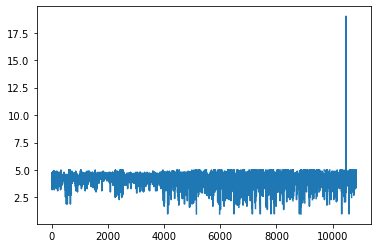

In [18]:
# Distribuição dos dados
df.Rating.plot()

In [19]:
# Localizar este valor
df[df['Rating'] > 10]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [20]:
# Eliminar este valor
df = df.drop([10472])
df.Rating.describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

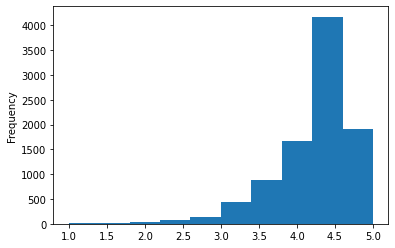

In [21]:
# Histograma
df.Rating.plot(kind='hist')

In [22]:
# the most hight rate apps
df.sort_values(by=['Rating'], ascending=False, inplace=True)
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9056,Santa's Monster Shootout DX,GAME,5.0,4,33M,50+,Paid,$1.99,Teen,Action,"August 15, 2013",1.05,2.2 and up
8395,DG TV,NEWS_AND_MAGAZINES,5.0,3,5.7M,100+,Free,0,Everyone,News & Magazines,"May 26, 2018",1.2,4.1 and up
8493,PK and DK Audio App,FAMILY,5.0,2,3.9M,100+,Free,0,Everyone,Entertainment,"October 25, 2017",5.1.4,4.1 and up


## c2. Dados Categóricos

In [23]:
# Quem são
df['Category'].unique()

array(['GAME', 'NEWS_AND_MAGAZINES', 'FAMILY', 'BUSINESS', 'LIFESTYLE',
       'PRODUCTIVITY', 'TOOLS', 'FINANCE', 'SHOPPING',
       'BOOKS_AND_REFERENCE', 'SOCIAL', 'DATING', 'COMICS', 'EVENTS',
       'PERSONALIZATION', 'TRAVEL_AND_LOCAL', 'COMMUNICATION', 'MEDICAL',
       'SPORTS', 'PARENTING', 'HEALTH_AND_FITNESS', 'FOOD_AND_DRINK',
       'PHOTOGRAPHY', 'ART_AND_DESIGN', 'LIBRARIES_AND_DEMO',
       'AUTO_AND_VEHICLES', 'MAPS_AND_NAVIGATION', 'EDUCATION',
       'VIDEO_PLAYERS', 'BEAUTY', 'HOUSE_AND_HOME', 'WEATHER',
       'ENTERTAINMENT'], dtype=object)

In [24]:
# Quantas são?
len(df['Category'].unique())

33

In [25]:
# Quantas são por categoria?
df['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
Name: Category, dtype: int64

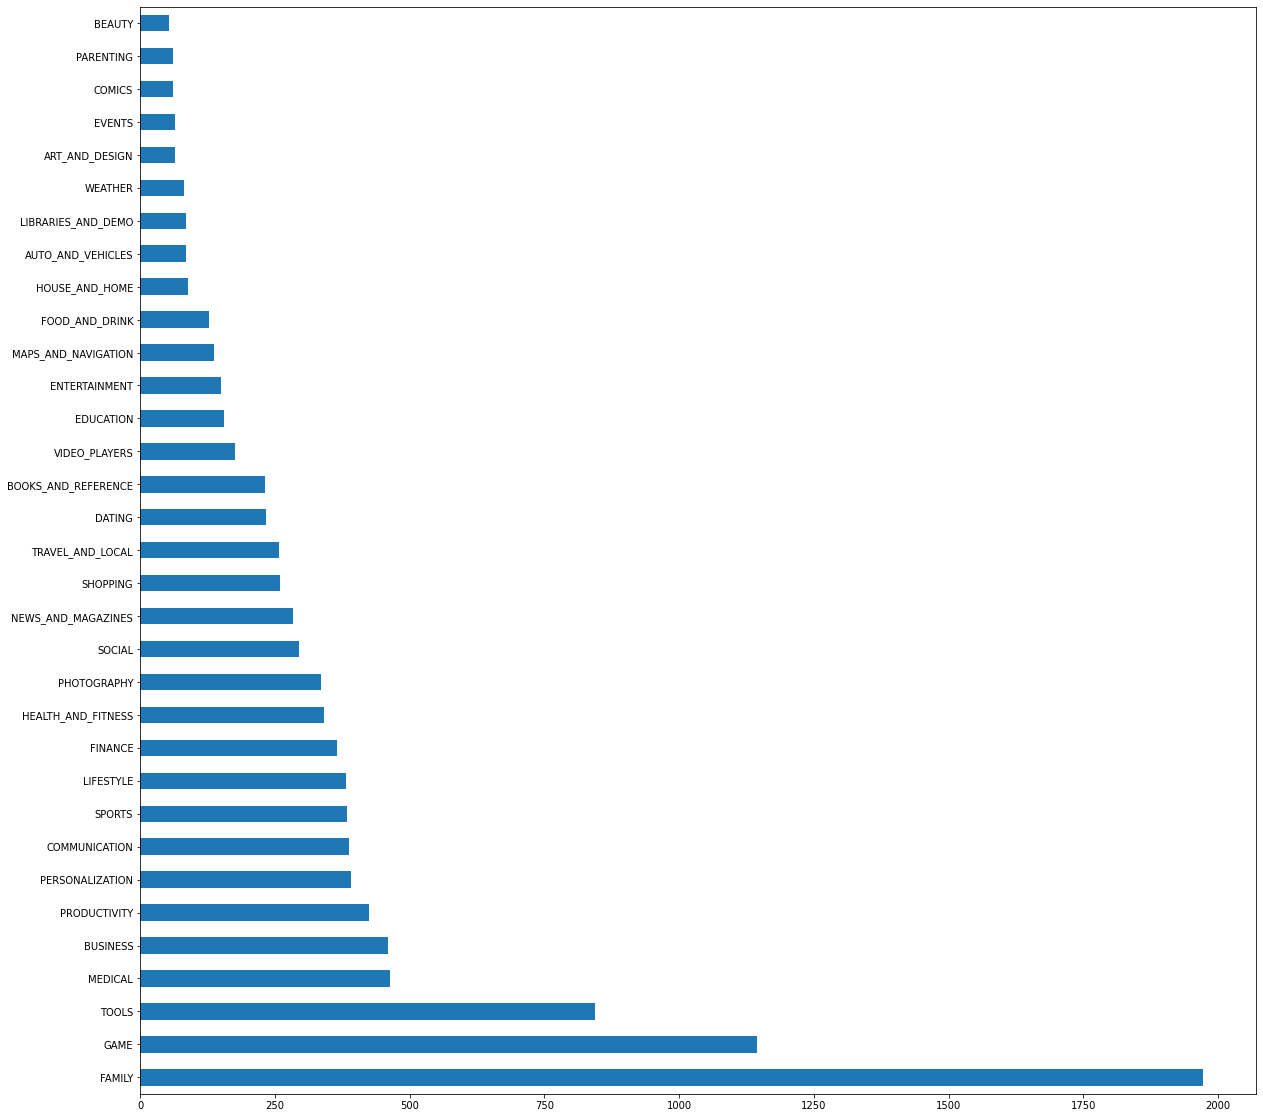

In [27]:
# Mostrar isso graficamente
plt.figure(figsize = (20,20))
df['Category'].value_counts().plot(kind='barh')

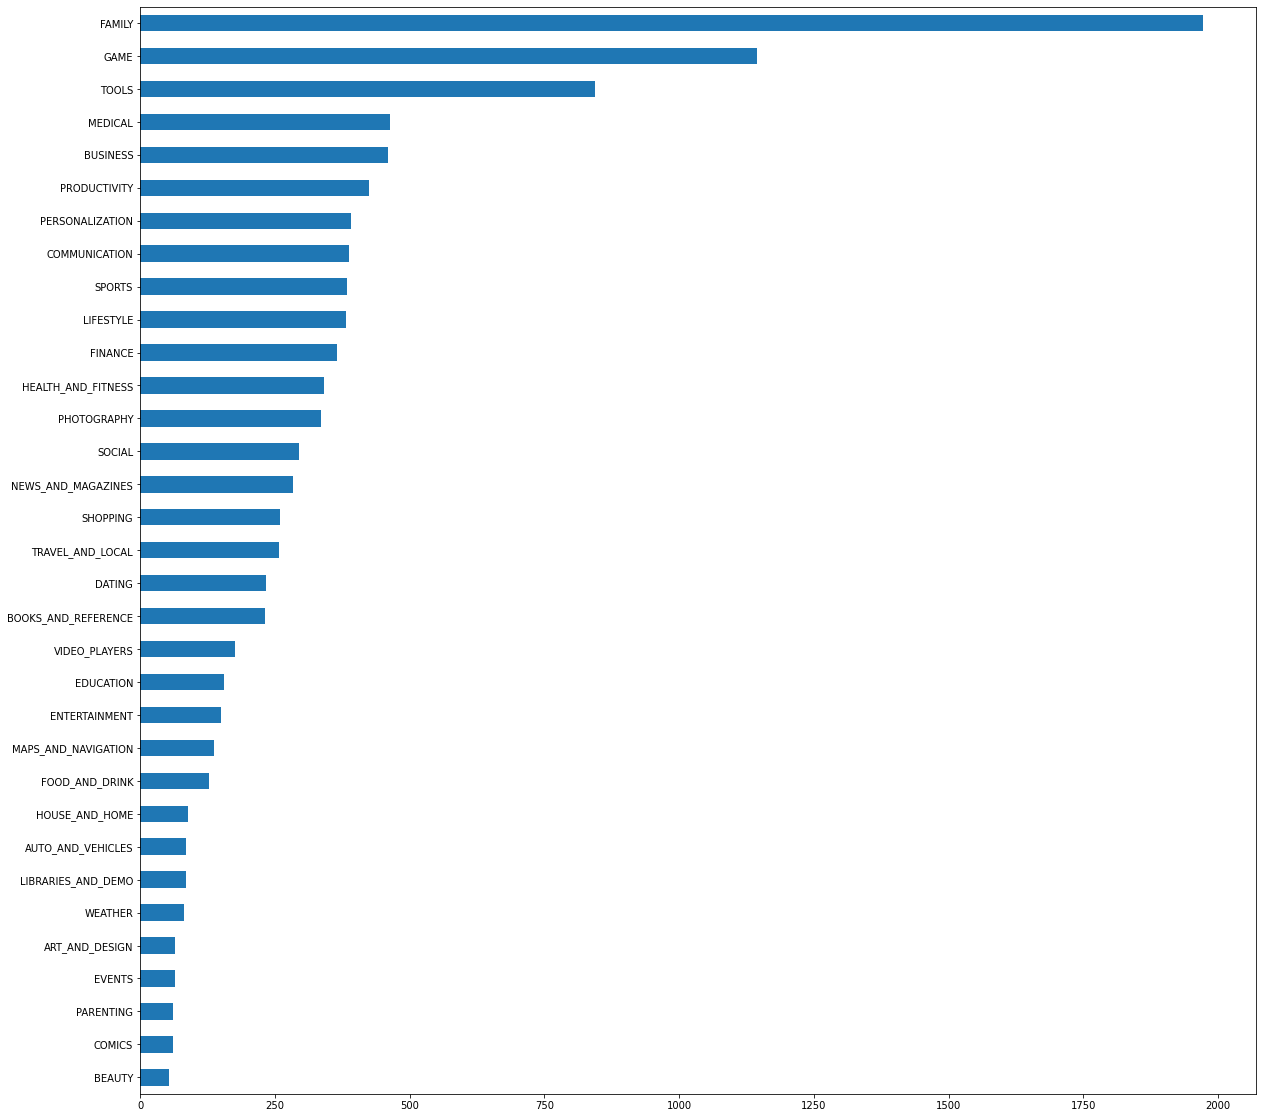

In [28]:
plt.figure(figsize = (20,20))
df['Category'].value_counts().sort_values(ascending=True).plot(kind='barh')

## c3. Tipos Errados

In [29]:
df['Reviews'].dtype

dtype('O')

In [30]:
# Modificar para inteiro (através de uma função lambda)
df['Reviews'] = df['Reviews'].apply(lambda x : int(x))
df['Reviews'].dtype

dtype('int64')

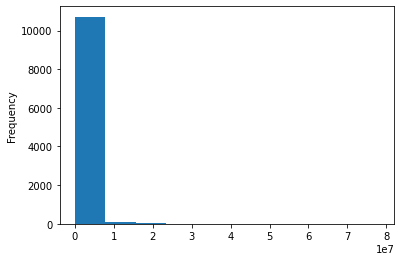

In [32]:
# Distribuição
df['Reviews'].plot(kind='hist')

In [33]:
df.describe()

,Rating,Reviews
count,9366.000000,1.084000e+04
mean,4.191757,4.441529e+05
std,0.515219,2.927761e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.477550e+04
max,5.000000,7.815831e+07


In [34]:
# Encontrar o Top 10 dos Maiores Reviews
df.sort_values(by=['Reviews'], ascending=False, inplace=True)
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
3943,Facebook,SOCIAL,4.1,78128208,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device


## c4 - Valores Misturados 

In [35]:
df['Size'].unique()

array(['Varies with device', '98M', '76M', '97M', '74M', '40M', '52M',
       '14M', '15M', '88M', '24M', '85M', '94M', '99M', '63M', '92M',
       '17M', '62M', '71M', '70M', '34M', '95M', '67M', '58M', '100M',
       '59M', '53M', '96M', '16M', '26M', '41M', '9.9M', '51M', '32M',
       '11M', '55M', '60M', '79M', '69M', '42M', '77M', '57M', '82M',
       '75M', '36M', '3.3M', '68M', '22M', '7.6M', '50M', '33M', '7.4M',
       '89M', '18M', '25M', '78M', '46M', '49M', '9.7M', '37M', '72M',
       '39M', '87M', '6.1M', '5.1M', '28M', '29M', '61M', '7.1M', '48M',
       '21M', '35M', '54M', '12M', '56M', '3.8M', '8.7M', '91M', '27M',
       '45M', '66M', '31M', '4.7M', '8.2M', '43M', '13M', '47M', '20M',
       '80M', '6.6M', '3.1M', '6.5M', '9.1M', '30M', '7.9M', '4.2M',
       '44M', '4.4M', '93M', '8.9M', '83M', '3.5M', '73M', '90M', '9.8M',
       '19M', '9.2M', '64M', '1.5M', '5.2M', '23M', '5.3M', '2.5M', '10M',
       '2.7M', '2.1M', '86M', '4.9M', '2.9M', '9.0M', '8.4M', '7.3M'

In [36]:
# Quantas linhas com 'Varies with device'?
len(df[df['Size']=='Varies with device'])

1695

In [37]:
# Trocar 'Varies with device' pelo valor 'NaN'
df['Size'].replace('Varies with device', np.nan, inplace=True)
len(df[df['Size']=='Varies with device'])

0

In [38]:
# Função para realizar as conversões de tipo
def convert_size(size):
    if size is not np.nan:
        if 'k' in size:
            return float(size.replace('k','')) * 1000
        if 'M' in size:
            return float(size.replace('M','')) * 1000000
        
# Aplica ao tamanho
df['Size'] = df['Size'].apply(convert_size)

In [54]:
# Coloca os valores NaN para a média
df['Size'].mean()

21516529.524329025

In [39]:
# Coloca os valores NaN para a média por CATEGORIA
df['Size'].fillna(df['Size'].mean(), inplace=True)
df['Size'].unique()

array([2.15165295e+07, 9.80000000e+07, 7.60000000e+07, 9.70000000e+07,
       7.40000000e+07, 4.00000000e+07, 5.20000000e+07, 1.40000000e+07,
       1.50000000e+07, 8.80000000e+07, 2.40000000e+07, 8.50000000e+07,
       9.40000000e+07, 9.90000000e+07, 6.30000000e+07, 9.20000000e+07,
       1.70000000e+07, 6.20000000e+07, 7.10000000e+07, 7.00000000e+07,
       3.40000000e+07, 9.50000000e+07, 6.70000000e+07, 5.80000000e+07,
       1.00000000e+08, 5.90000000e+07, 5.30000000e+07, 9.60000000e+07,
       1.60000000e+07, 2.60000000e+07, 4.10000000e+07, 9.90000000e+06,
       5.10000000e+07, 3.20000000e+07, 1.10000000e+07, 5.50000000e+07,
       6.00000000e+07, 7.90000000e+07, 6.90000000e+07, 4.20000000e+07,
       7.70000000e+07, 5.70000000e+07, 8.20000000e+07, 7.50000000e+07,
       3.60000000e+07, 3.30000000e+06, 6.80000000e+07, 2.20000000e+07,
       7.60000000e+06, 5.00000000e+07, 3.30000000e+07, 7.40000000e+06,
       8.90000000e+07, 1.80000000e+07, 2.50000000e+07, 7.80000000e+07,
      

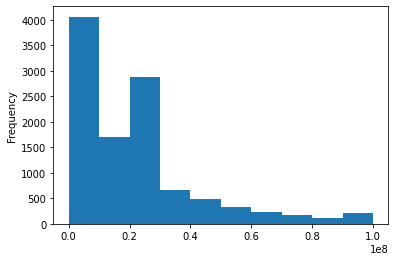

In [40]:
# print largest size apps
df.sort_values(by=['Size'], ascending=False, inplace=True)
df['Size'].plot(kind='hist')

## c5. Detalhes a mais

In [41]:
# CASO 'Installs'
df['Installs'].head()

8409         10,000+
1988    100,000,000+
1565     10,000,000+
5530      1,000,000+
4690          5,000+
Name: Installs, dtype: object

In [42]:
# Need to convert install data
# remove +
# remove ,
# convert to int number
def convert_install(number):
    return int(number.replace('+','').replace(',',''))

df['Installs'] = df['Installs'].apply(convert_install)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8409,Car Crash III Beam DH Real Damage Simulator 2018,GAME,3.6,151,100000000.0,10000,Free,0,Everyone,Racing,"May 20, 2018",1.03,4.1 and up
1988,Hungry Shark Evolution,GAME,4.5,6074627,100000000.0,100000000,Free,0,Teen,Arcade,"July 25, 2018",6.0.0,4.1 and up
1565,Talking Babsy Baby: Baby Games,LIFESTYLE,4.0,140995,100000000.0,10000000,Free,0,Everyone,Lifestyle;Pretend Play,"July 16, 2018",9.0,4.0 and up
5530,The Walking Dead: Our World,GAME,4.0,22435,100000000.0,1000000,Free,0,Teen,Action,"August 1, 2018",1.1.0.3,5.0 and up
4690,Vi Trainer,HEALTH_AND_FITNESS,3.6,124,100000000.0,5000,Free,0,Everyone,Health & Fitness,"August 2, 2018",2.0.0.11,5.0 and up


In [43]:
df.describe()

,Rating,Reviews,Size,Installs
count,9366.000000,1.084000e+04,1.084000e+04,1.084000e+04
mean,4.191757,4.441529e+05,2.151653e+07,1.546434e+07
std,0.515219,2.927761e+06,2.074749e+07,8.502936e+07
min,1.000000,0.000000e+00,8.500000e+03,0.000000e+00
25%,4.000000,3.800000e+01,5.900000e+06,1.000000e+03
50%,4.300000,2.094000e+03,1.800000e+07,1.000000e+05
75%,4.500000,5.477550e+04,2.600000e+07,5.000000e+06
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09


In [44]:
# CASO 'Price'
df['Price'].unique()

array(['0', '$15.99', '$0.99', '$2.99', '$29.99', '$7.49', '$4.77',
       '$1.99', '$1.49', '$4.99', '$9.99', '$3.99', '$2.49', '$5.99',
       '$33.99', '$4.49', '$24.99', '$19.40', '$14.99', '$4.60', '$6.99',
       '$3.61', '$11.99', '$399.99', '$19.99', '$7.99', '$79.99', '$2.56',
       '$12.99', '$74.99', '$15.46', '$1.00', '$1.61', '$4.29', '$3.49',
       '$2.50', '$8.99', '$2.95', '$3.95', '$3.90', '$4.59', '$5.49',
       '$17.99', '$10.00', '$6.49', '$39.99', '$28.99', '$4.85', '$19.90',
       '$9.00', '$16.99', '$89.99', '$1.20', '$8.49', '$13.99', '$1.70',
       '$46.99', '$1.59', '$400.00', '$1.75', '$109.99', '$3.88',
       '$154.99', '$4.84', '$389.99', '$14.00', '$1.97', '$1.76',
       '$200.00', '$10.99', '$379.99', '$3.28', '$299.99', '$1.50',
       '$30.99', '$2.60', '$2.00', '$1.26', '$18.99', '$37.99', '$25.99',
       '$2.59', '$1.96', '$3.08', '$394.99', '$3.02', '$2.90', '$3.04',
       '$1.04', '$4.80', '$5.00', '$1.29'], dtype=object)

In [45]:
def convert_price(price):
    if '$' in str(price):
        return float(price.replace('$',''))
    else:
        return float(price)

df['Price'] = df['Price'].apply(convert_price)
df.describe()

,Rating,Reviews,Size,Installs,Price
count,9366.000000,1.084000e+04,1.084000e+04,1.084000e+04,10840.000000
mean,4.191757,4.441529e+05,2.151653e+07,1.546434e+07,1.027368
std,0.515219,2.927761e+06,2.074749e+07,8.502936e+07,15.949703
min,1.000000,0.000000e+00,8.500000e+03,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,5.900000e+06,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.800000e+07,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,2.600000e+07,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,400.000000


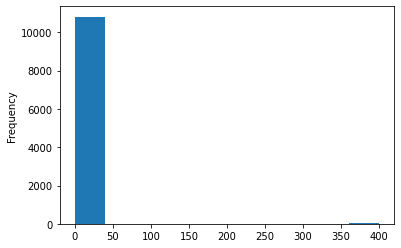

In [46]:
df['Price'].plot(kind='hist')

In [47]:
df[df['Price'] > 300]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5373,I AM RICH PRO PLUS,FINANCE,4.0,36,41000000.0,1000,Paid,399.99,Everyone,Finance,"June 25, 2018",1.0.2,4.1 and up
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,NaN,0,40000000.0,0,Paid,399.99,Everyone,Lifestyle,"December 1, 2017",MONEY,4.1 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
5358,I am Rich!,FINANCE,3.8,93,22000000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700000.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300000.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5366,I Am Rich,FAMILY,3.6,217,4900000.0,10000,Paid,389.99,Everyone,Entertainment,"June 22, 2018",1.5,4.2 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700000.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5369,I am Rich,FINANCE,4.3,180,3800000.0,5000,Paid,399.99,Everyone,Finance,"March 22, 2018",1.0,4.2 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900000.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up


In [48]:
# Caso 'Genres' - Multiplos valores na mesma coluna
df['Genres'].unique()

array(['Racing', 'Arcade', 'Lifestyle;Pretend Play', 'Action',
       'Health & Fitness', 'Simulation', 'Medical', 'Sports', 'Finance',
       'Role Playing', 'Puzzle', 'Libraries & Demo', 'Casual',
       'Racing;Action & Adventure', 'Entertainment',
       'Casual;Action & Adventure', 'Tools', 'Adventure', 'Strategy',
       'Parenting', 'Shopping', 'Business', 'Puzzle;Brain Games',
       'Educational;Education', 'Auto & Vehicles', 'Card',
       'Education;Brain Games', 'Photography', 'Education', 'Social',
       'Action;Action & Adventure', 'Trivia', 'Music', 'Lifestyle',
       'Education;Education', 'Simulation;Action & Adventure', 'Board',
       'Adventure;Education', 'Education;Pretend Play',
       'Arcade;Pretend Play', 'Educational;Pretend Play',
       'Video Players & Editors', 'Personalization',
       'Casual;Pretend Play', 'Travel & Local', 'Educational', 'Word',
       'Books & Reference', 'Casual;Creativity', 'Parenting;Education',
       'Role Playing;Action & Adv

In [49]:
# print number or genres
len(df['Genres'].unique())

119

In [50]:
# only get genres before ; and remove all remain
# print out the unique genre
df['Genres'] = df['Genres'].str.split(';').str[0]
df['Genres'].unique()

array(['Racing', 'Arcade', 'Lifestyle', 'Action', 'Health & Fitness',
       'Simulation', 'Medical', 'Sports', 'Finance', 'Role Playing',
       'Puzzle', 'Libraries & Demo', 'Casual', 'Entertainment', 'Tools',
       'Adventure', 'Strategy', 'Parenting', 'Shopping', 'Business',
       'Educational', 'Auto & Vehicles', 'Card', 'Education',
       'Photography', 'Social', 'Trivia', 'Music', 'Board',
       'Video Players & Editors', 'Personalization', 'Travel & Local',
       'Word', 'Books & Reference', 'Maps & Navigation', 'House & Home',
       'Dating', 'Food & Drink', 'Productivity', 'Casino',
       'Communication', 'News & Magazines', 'Events', 'Beauty', 'Weather',
       'Comics', 'Art & Design', 'Music & Audio'], dtype=object)

In [51]:
len(df['Genres'].unique())

48

## Situação Final

In [52]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8409,Car Crash III Beam DH Real Damage Simulator 2018,GAME,3.6,151,100000000.0,10000,Free,0.00,Everyone,Racing,"May 20, 2018",1.03,4.1 and up
1988,Hungry Shark Evolution,GAME,4.5,6074627,100000000.0,100000000,Free,0.00,Teen,Arcade,"July 25, 2018",6.0.0,4.1 and up
1565,Talking Babsy Baby: Baby Games,LIFESTYLE,4.0,140995,100000000.0,10000000,Free,0.00,Everyone,Lifestyle,"July 16, 2018",9.0,4.0 and up
5530,The Walking Dead: Our World,GAME,4.0,22435,100000000.0,1000000,Free,0.00,Teen,Action,"August 1, 2018",1.1.0.3,5.0 and up
4690,Vi Trainer,HEALTH_AND_FITNESS,3.6,124,100000000.0,5000,Free,0.00,Everyone,Health & Fitness,"August 2, 2018",2.0.0.11,5.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10072,ExDialer PRO Key,COMMUNICATION,4.5,5474,17000.0,100000,Paid,3.99,Everyone,Communication,"January 15, 2014",81,2.1 and up
4977,Ad Remove Plugin for App2SD,PRODUCTIVITY,4.1,66,17000.0,1000,Paid,1.29,Everyone,Productivity,"September 25, 2013",1.0.0,2.2 and up
4983,My baby firework (Remove ad),FAMILY,4.1,30,14000.0,1000,Paid,0.99,Everyone,Entertainment,"April 25, 2013",Varies with device,Varies with device
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11000.0,1000000,Free,0.00,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 8409 to 1532
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


Obrigado e até a próxima \
Fernando Anselmo